## **Chaper 4 - [Training Models](https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb)**

### **1. Regresión Lineal**

A continuación desarrollaremos una regresión lineal programando la ecuación normal y utilizando sklearn. La idea es familiarizarse con lo que está debajo del capó de la función de sklearn. Veremos al final de esta parte que utilizar sklearn es muchísimo mejor, tanto por la menor cantidad de ñineas como la menor complejidad que significa usar el modelo para predecir.

La función será: ***y = 3X + 4 +  + intercepto + ruido***

Text(0.5, 1.0, 'Función Lineal')

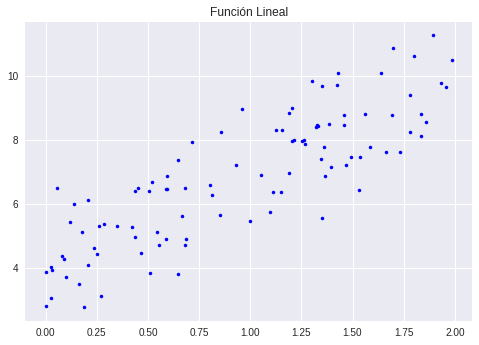

In [258]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1) #Listado de Xs aleatorios
y = 4 + 3*X + np.random.randn(100,1)
plt.plot(X, y, "b.") #scatter
plt.title("Función Lineal")

**Computamos la ecuación normal**: Veremos su similaridad con los valores reales (***y=3X + 4 e***)

In [259]:
X_b = np.c_[np.ones((100,1)), X]
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #buscámos los coeficientes de la ecuación
theta

array([[4.06661338],
       [2.91718221]])

Con esto podemos hacer predicciones, es decir, podemos utilizar los parámetros estimados para utilizarlos en nuevos contextos o situaciones y predecir el valor de nuevos y's a medida que le entregamos nuevos Xs (En este caso 2)

In [260]:
X_new = np.array([[0], [2]]) #Definimos los nuevos X
X_new_b = np.c_[np.ones((2, 1)), X_new] #Concatenamos 1s a los nuevos Xs
y_predict = X_new_b.dot(theta) #Multiplicamos los parametros por dichos Xs
y_predict #Entregamos el resultado

array([[4.06661338],
       [9.90097779]])

Podemos añadir al gráfico anterior la recta que minimiza el error

Text(0.5, 1.0, 'Recta de función')

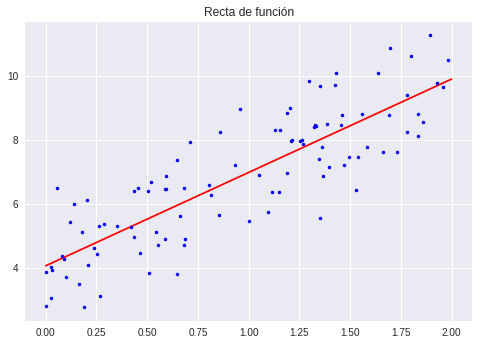

In [261]:
plt.plot(X_new, y_predict, "r-") #Unimos los puntos en formato de linea recta
plt.plot(X, y, "b.")
plt.title("Recta de función")

**Bueno, utilizar los códigos anteriores no tiene mucho sentido hoy. Ya que contamos con Sklearn. Ahora veremos como hacer lo mismo con la función de la librería.**

In [262]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()    #creamos un modelo que utilice la función de regresión lineal
model.fit(X, y)               #Estimamos los parametros
model.intercept_, model.coef_ #Intercepto y Coeficiente

(array([4.06661338]), array([[2.91718221]]))

In [263]:
model.predict(X_new) #Lo hacemos predecir los valores de la variable dependiente con los nuevos X (Los que nunca ha visto)

array([[4.06661338],
       [9.90097779]])

### **2. Gradient Descent**

Otra forma de estimar los parámetros de un problema. La idea de esta metodología es minimizar una función de costos (la de errores) a través de una iteración de pasos (el usuario puede definir la cantidad de iteraciones y el ritmo al que avanza). 

Es decir, el computador fija aleatoriamente el valor de los parametros y ve cuanto da la función de costos. Luego cambia los parametros en función del "learning rate" que fue asiganado (Qué tan grande los pasos). Y así sigue por cuantas iteraciones hayamos escogido hasta llegar al óptimo o acercarse a este. 

Muy pocos pasos no serviran para llegar al óptimo global, pasos muy grandes nos podrían llevar a no alcanzar nunca el óptimo global.

Veremos los 2 tipos de **Gradient Descent.**

####**2.1. Batch Gradient Descent**

Cuando tenemos problemas de regresión lineal con muchos parámetros y/o muchas observaciones, llegar al óptimo utilizando Gradient Descent es mucho más rápido que utilizar la Ecuación Normal (Es decir, una Regresión Lineal).

In [264]:
eta = 0.1                              #learning rate
n_iteraciones = 1000                   #número de iteraciones
m = 100                                #100 muestras con observación unica
theta = np.random.randn(2, 1)          #definimos thetas aleatorios
for iteracion in range(n_iteraciones): #para cada iteracion en 1000 iteraciones
  gradientes = 2/m * X_b.T.dot(X_b.dot(theta)-y) #obtenemos el gradiente
  theta = theta - eta*gradientes       #corregimos por cada gradiente y le añadimos el eta para moverse hacia el theta óptimo
theta

array([[4.06661338],
       [2.91718221]])

####**2.1. Stochastic Gradient Descent**

El gran problema de Batch Gradient Descent es que utiliza todo la muestra de entrenamiento para cada paso que da. Lo que es lento si estamos trabajando con una muestra muy grande.

Stochastic Gradient Descent tomará aleatoriamente una observación sucesiva,mente, y trabajará aleatoriamente a meidad que las toma, llegando a diversos valores de la función de costos, pudiendo pasar por el mínimo, pero sin detenerse en él hasta que termine de iterar las veces que le pedimos. 

Esto puede ser malo, pero tambien permite que logremos salir del mínimo local. Una solución es establecer un learning rate alto para escapar del mínimo local y a medida que el computador itera hacer que el **learning rate** vaya disminuyendo. Para que cada paso adicional que de, no se aleje tanto del anterior.

In [267]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0 / (t+ t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)   #Método de Selección de Xs
    xi = X_b[random_index:random_index+1] #tomamos una observacion
    yi = y[random_index:random_index+1]   #Toamos los Ys en función de los Xs seleccionados
    gradients = 2*xi.T.dot(xi.dot(theta)-yi) #Funcion de Gradientes
    eta = learning_schedule(epoch*m+1)    #Learning Rate Dinamico
    theta = theta -eta*gradients          #Vamos corriegiendo el theta en funcion del learning rate y del gradiente


theta

array([[4.09227029],
       [2.84003048]])

**Podemos hacer lo mismo con Sklearn**

In [268]:
from sklearn.linear_model import SGDRegressor
sgd_model = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_model.fit(X, y)
sgd_model.intercept_, sgd_model.coef_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([4.08600019]), array([2.94644777]))

####**2.3 Mini_Batch Gradient Descent**

En vez de utilizar toda la muestra como Batch o una observación como Stochastic. Este lo que hace es tomar pequeñas muestras de la muestra.Eso sí, podría quedar en un mínimo local (En todo caso las regresiones lineales, o problemas lineales no tienen mínimo local, solo uno global). **Para este no encontré una función similar en Sklearn**. 

***Lo copié literal del sitio del libro guía. Ya que tampoco está la metodología "a mano en el libro que tengo"***

In [269]:
theta_path_mgd = [] #Lista vacía

n_iterations = 50 #Número de iteraciones
minibatch_size = 20 #Tamaño de sub-muestra

np.random.seed(42) #Implantamos semilla para reproducción
theta = np.random.randn(2,1) #Definimos un parámetro aleatorio para iniciar

t0, t1 = 200, 1000
def learning_schedule(t): #vamos ajustando el aprendizaje
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations): #para cada epoca en las 50 iteraciones
    shuffled_indices = np.random.permutation(m) #permutamos indices
    X_b_shuffled = X_b[shuffled_indices] #seleccionamos un valor
    y_shuffled = y[shuffled_indices] #selecionamos un y correspondiente al seleccionado previamente
    for i in range(0, m, minibatch_size): #m tamaño de muestra
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradientes = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi) #formula de GD
        eta = learning_schedule(t) #ritmo de aprendizaje
        theta = theta - eta * gradientes #ajuste iterativo de thetas
        theta_path_mgd.append(theta) #junto los thetas que el computador va estimando
theta

array([[4.08045205],
       [2.93842042]])

### **3. Regresiones Polinómicas**

El mundo no es lineal. Las relaciones son más complejas. Por tanto necesitamos funciones que capturen mejor estas. La solución es añadir exponentes a nuestras funciones.

La función es: ***y = 0.5X^2 + X + intercepto + ruido***

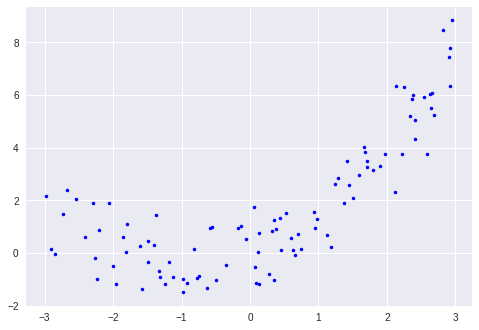

In [270]:
m = 100                                   #definimos el npumero de observaciones
X = 6*np.random.rand(m, 1) - 3            #Valores de X
y = 0.5 * X**2 + X + np.random.randn(m,1) #Y en función de X
plt.plot(X, y, "b.")                      #Graficamos puntos en el plano

Jamás podríamos llegar a un óptimo en esta relación. Por tanto tenemos que transformar los parámetros para poder ajustar el modelo. 

Con ello podemos utilizar una función de preprocesamiento de datos de Sklear. Que detecta las relaciones y nos entrega la función que mejor se ajusta al comportamiento y cantidad de grados asigandos a la ecuación. 

De esta manera podemos encontrar funciones que se ajusta mejor al problema, y que las manejamos como si se tratase de un problema lineal gracias al preprocesamiento que hemos hecho.

In [271]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False) #Definimos la cantidad de grados a dos (Así solo consideramos un cuadrado y no tambien la multiplicaciones de atributos
X_poly = poly_features.fit_transform(X) #Ajustamos y transformamosm los Xs con los que alimentamos a la función
X_poly[0] #El valor del atributo original y el cuadrado de este

array([2.38942838, 5.709368  ])

In [272]:
lin_reg = LinearRegression() #Llamosmos a una regresión lineal
lin_reg.fit(X_poly, y) #Ajustamos el modelo
lin_reg.intercept_, lin_reg.coef_ #con esto vemos que la estimación se acerca a la función original

(array([-0.0264767]), array([[0.95038538, 0.52577032]]))

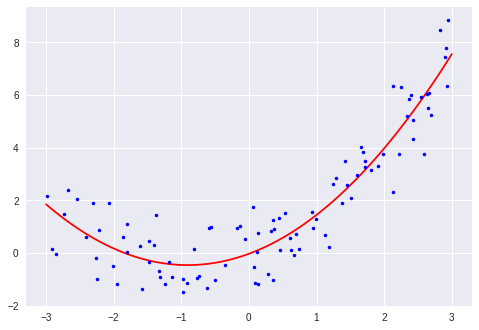

In [273]:
X_new = np.linspace(-3, 3, 100).reshape(100,1) #Definimos nuevos X
X_new_poly = poly_features.fit_transform(X_new) #transformamos los valores aleatorios de X para considerar relación no lineal
y_new = lin_reg.predict(X_new_poly) #predecimos valores de Y para trazar curva roja
plt.plot(X_new,y_new, "r-") #Trazamos curva
plt.plot(X, y, "b.") #Graficamos puntos

### **4. Curvas de Aprendizaje**

Dependiendo de cuantos grados le incertemos a la función polinómica será el tamaño del error, mayor cantidad de grados, menor cantidad de grados, pero mayor será el overfit.

Una curva de aprendizaje nos permite entender cuando el modelo hace overfit y cuando hace underfit. 

Si es que la curva de aprendizaje se aplana, y el usar mayor cantidad de datos no achica el error, no será necesario añadir más observaciones al modelo, sino que tendremos que mejorar este y/o añadirle mejores atributos.

Otra forma de hacerlo es hacerlo a través de una cross-validación (si generaliza bien está ok, si no lo hace estamos teniendo un modelo muy complejo)

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y): #para graficar curvas de aprendizaje
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) #tamaño de entrenamiento/test
  train_errors, val_errors = [], [] #listas vacias para errores de entrenamiento y validación
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m]) #hago un fit con m muestras
    y_train_predict = model.predict(X_train[:m]) #Predigo en la muestra de entrenamiento
    y_val_predict =model.predict(X_val) #Predigo en la muestra de testeo
    train_errors.append(mean_squared_error(y_train_predict, y_train[:m])) #Obtengo MSE de muestra de entrenamiento
    val_errors.append(mean_squared_error(y_val_predict, y_val)) #Obtengo MSE de muestra de testeo
  plt.plot(np.sqrt(train_errors), "r-+", lw=2, label="Entrenamiento") #Ploteo errores de entrenamiento
  plt.plot(np.sqrt(val_errors), "b-", lw=3, label="Validación") #Ploteo errores de testeo
  plt.legend(loc="upper right", fontsize=14) #Caracteristicas de leyenda
  plt.xlabel("Training set size", fontsize=14) #Nombre de eje X
  plt.ylabel("RMSE", fontsize=14) #Nombre de eje Y

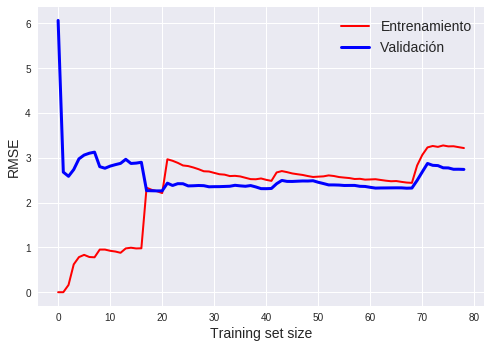

In [0]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)

Podemos hacer un Pipeline para automatizar la función y añadir la cantidad de grados que queramos fácilmente (hacer más complejo el modelo)

In [0]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly featuress", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
 ])

[0, 80, 0, 3]

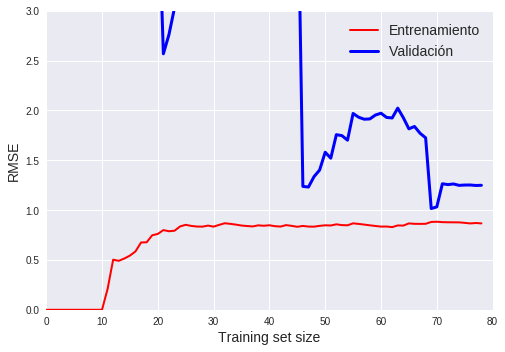

In [276]:
plot_learning_curve(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
#VEMOS QUE HACE OVERFIT YA QUE HAY UN GAP ENTRE LA VALIDACION Y EL ENTRENAMIENTO, SI ESTE ES NEGATIVO HAY UN UNDERFIT

###**5. Modelos Regularizados**

La regularización permite reducir el overfit, por ejemplo, reduciendo los grados de libertad de la función. Veremos: Ridge, Lasso, Elastic Net.

####**5.1 Ridge**

Lo que hace es introducir una función de costos adicional que obliga al computador a mantener lo más pequeño posible los pesos de cada parámetro. Esta función de costos adicional es utilizada sólo al momento de entrenamiento. Se determina por alfa, mientras más grande este, mayor será la importncia de reducir los pesos hasta llegar a cero, lo que hara que el modelo trace una linea recta que pase por la media de los datos.

In [277]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1, solver="cholesky")
ridge.fit(X, y)
ridge.predict([[1.5]])

array([[3.13357033]])

####**5.2 Lasso**

Algo que caracteriza esta metodología de regresión lineal es que lleva a cero a los atributos menos importantes. Disminuyendo la cantidad de parámetros que integra el modelo. Ojo, no los elimina, pero los reduce, manualmente podemos eliminarlos al ver que su importancia cayó.

In [278]:
from sklearn.linear_model import Lasso
lasso_reg =Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])


array([3.09481859])

####**5.3 Elastic Net**

Se trata de una combinación de los dos anteriores. Ese mix es controlable, definiendo r en cero tendremos un resultado identico a Ridge, con 1 será igual a Lasso.

**Por tanto ¿Cuando utilizar una regresión lineal, Ridge, Lasso o Elastic Net? Siempre es preferible tener algo de regularización, por tanto Ridge es una excelente opción., En caso de que sospechemos que existen variables irrelevantes será preferible utilizar Lasso o Elastic Net.**

In [279]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([3.09373477])

### **6. Regresión Logistica**

In [280]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [0]:
X = iris["data"][:,3:] #Seleccionamos el X (Ancho de pétalo)
y = (iris["target"] == 2).astype(np.int) #seleccionamos Y, los Iris Virginica se les asigana 1

In [282]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

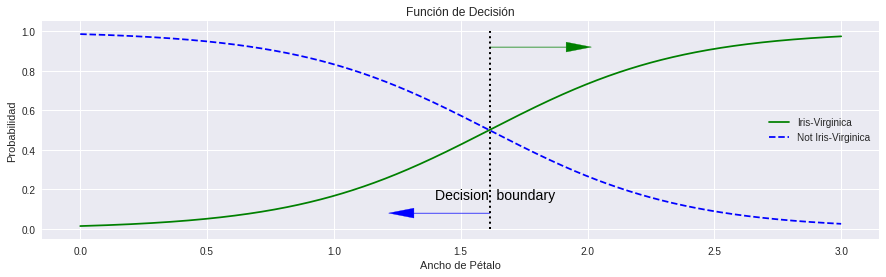

In [283]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(15, 4)) #tamaño de gráfico
plt.plot(X_new, y_proba[:,1], "g-", label="Iris-Virginica") #Si es que es 1 es Iris Virginica
plt.plot(X_new, y_proba[:,0],"b--", label="Not Iris-Virginica") #Si es que es 0 no es Iris Virginica
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2) #Linea Vertical Negra, fijamos el X donde la probabilidad de ser Iris Virginica es 1
plt.title("Función de Decisión") #Título de gráfico
plt.ylabel("Probabilidad") #Título de eje Y
plt.xlabel("Ancho de Pétalo") #Título de eje X
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center") #Límite de decisión
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b') #Flecha que marca Not Iris Virginica
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')  #Flecha que marca Iris Virginica
plt.legend(loc="center right")

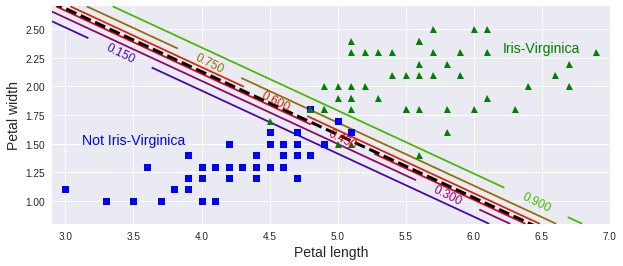

In [284]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  #Largo y ancho de pétalo
y = (iris["target"] == 2).astype(np.int) #target

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42) #regresión con argumentos
log_reg.fit(X, y) #ajustamos el modelo

x0, x1 = np.meshgrid( #definimos posición de lineas
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()] # concatenamos los valores de x0 y x1 aplicando método .ravel()

y_proba = log_reg.predict_proba(X_new) #definimos probabilidad de pertenecer o no

plt.figure(figsize=(10, 4)) #Tamaño de la figura
plt.plot(X[y==0, 0], X[y==0, 1], "bs") #Ploteamos la relación de No iris Virginica
plt.plot(X[y==1, 0], X[y==1, 1], "g^") #Ploteamos la relación de iris Virginica

zz = y_proba[:, 1].reshape(x0.shape) #creamos lineas coloridas
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg) #creamos lineas coloridas

plt.clabel(contour, inline=1, fontsize=12) #números de lineas coloridas
left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]


plt.plot(left_right, boundary, "k--", linewidth=3) #linea negra no continua
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center") #Nombre observación para target = 0
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center") #Nombre observación para target = 1
plt.xlabel("Petal length", fontsize=14) #Nombre de eje x
plt.ylabel("Petal width", fontsize=14) #Nombre de eje y
plt.axis([2.9, 7, 0.8, 2.7]) #truncamos ejes
plt.show()

**Gráfico copiado, pero estudiado**

###**7. Softmax**

Una regresión logistica que permite varias clases sin tener que entrenar cada una de las clases. Se usa con la regresión logistica con el argumento de multiclase igual a "multinomial"

In [285]:
X = iris["data"][:,(2, 3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)
softmax_reg.predict([[5, 2]]) #pertenece a clase 2

array([2])

In [286]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

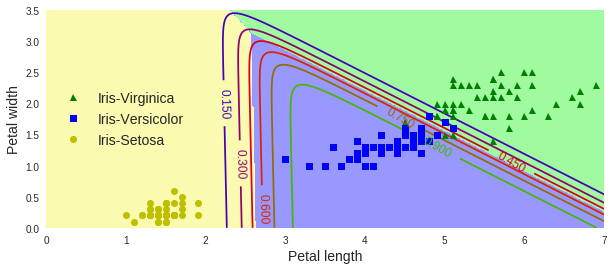

In [287]:
x0, x1 = np.meshgrid( #definimos tamaño de ejes
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()] #concatenamos valores de x0 y x1


y_proba = softmax_reg.predict_proba(X_new) #calculamos probabilidad de pertenencia a grupo
y_predict = softmax_reg.predict(X_new) #predecimos ante muestras nuevas

zz1 = y_proba[:, 1].reshape(x0.shape) #probabilidades
zz = y_predict.reshape(x0.shape) #estos números marcarán los límites coloridos junto a x0 y x1

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica") #Le damos forma y nombre distitintos a observaciones clase 2
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")#Le damos forma y nombre distitintos a observaciones clase 1
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")    #Le damos forma y nombre distitintos a observaciones clase 0

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0']) #Preparamos colres de la muestra

plt.contourf(x0, x1, zz, cmap=custom_cmap)#Colores de fondo en base  a x0, x1, zz
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg) #se añaden lineas coloridas
plt.clabel(contour, inline=1, fontsize=12) #Se le añaden números a lineas coloridas
plt.xlabel("Petal length", fontsize=14) #Nombre a eje X
plt.ylabel("Petal width", fontsize=14) #Nombre a eje Y
plt.legend(loc="center left", fontsize=14) #Añadimos leyendas
plt.axis([0, 7, 0, 3.5]) #Truncamos ejes
plt.show()

**Gráfico Copiado, pero estudiado**